# Estudo do Mercado Financeiro (Bancos) - Este notebook utiliza a biblioteca yfinance e outras para analista algumas ações da bolsa de valores

### Site:       https://filipedeabreu.com

### Autor:      Filipe de Abreu

### Manutenção:  Filipe de Abreu

<hr>

# Testado em
### OS: Windows 11                                      
### Versão do python: 3.12.7    

## OBS: Se tratando de dados da bolsa de valores, os valores extraidos podem variar dependendo da data em que forem consultados

## Etapa de Datawrangling, ou seja, preparação da base de dados para extração de informação

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import shap

In [4]:
#Função que retorna informações de um papel com base no input de um usuário
def cria_dataframe(acao, periodo):
    acao_santander =  yf.Ticker(acao)
    data = acao_santander.history(period=periodo)
    return data

### Consultando a ação do <font color='red'> Santander </font> ('SANB11.SA') no período de 1 ano ('1y')

In [7]:
df_santander = cria_dataframe('SANB11.SA','1y') #Selecionado a ação do santander, no periodo de 1 ano
df_santander.head(10)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2024-03-05 00:00:00-03:00,26.932072,26.969857,26.421958,26.733694,2230800,0.0,0.0
2024-03-06 00:00:00-03:00,26.903733,27.121003,26.544765,26.544765,1470600,0.0,0.0
2024-03-07 00:00:00-03:00,26.648675,26.733694,26.535318,26.686462,899200,0.0,0.0
2024-03-08 00:00:00-03:00,26.601445,27.121004,26.582552,26.950968,1146900,0.0,0.0
2024-03-11 00:00:00-03:00,26.950968,27.054878,26.847055,26.950968,951800,0.0,0.0
2024-03-12 00:00:00-03:00,27.026539,27.196577,26.818714,27.026539,1644300,0.0,0.0
2024-03-13 00:00:00-03:00,26.960414,27.206022,26.922627,27.045431,1580100,0.0,0.0
2024-03-14 00:00:00-03:00,27.007647,27.168238,26.894288,27.017094,1001200,0.0,0.0
2024-03-15 00:00:00-03:00,27.111558,27.291041,26.762036,27.149343,2933000,0.0,0.0


In [9]:
df_santander[['Dividends', 'Stock Splits']].head(30)

,Dividends,Stock Splits
Date,,
2024-03-05 00:00:00-03:00,0.0,0.0
2024-03-06 00:00:00-03:00,0.0,0.0
2024-03-07 00:00:00-03:00,0.0,0.0
2024-03-08 00:00:00-03:00,0.0,0.0
2024-03-11 00:00:00-03:00,0.0,0.0
2024-03-12 00:00:00-03:00,0.0,0.0
2024-03-13 00:00:00-03:00,0.0,0.0
2024-03-14 00:00:00-03:00,0.0,0.0
2024-03-15 00:00:00-03:00,0.0,0.0


In [11]:
df_santander['Stock Splits'][ df_santander['Stock Splits'] != 0]

Series([], Name: Stock Splits, dtype: float64)

In [13]:
df_santander['Dividends'][ df_santander['Dividends'] != 0]

Date
2024-04-22 00:00:00-03:00    0.402399
2024-07-22 00:00:00-03:00    0.402500
2024-10-18 00:00:00-03:00    0.348813
2025-01-23 00:00:00-03:00    0.402522
Name: Dividends, dtype: float64

### Primeiras impressoes

O dataframe apresenta váriaveis quantitativas continuas e não há variaveis categóricas, o index poderia talvez ser reduzido, deixando apenas a data e tirando a hora, já que não pretendo analisar de forma precisa o horário de abertura ou fechamento das ações. Se trata de dados populacionas, portanto, para qualquer analise estatisca, deve se ter em mente que sao dados populacionas, e nao de uma amsotra.

As variaveis 'Dividends' e 'Stock Splits' já de ínicio, apresentaram muitos valores iguais a 0, analisando essa variaveis separadamente, observei que apenas a variavel 'Dividends' possui valores diferentes de zero, porém em apenas 4 observações, portanto, irei remover essas variáveis  do dataframe

In [16]:
df_santander.drop(['Dividends', 'Stock Splits'], axis = 1, inplace = True)

### Extraindo algumas informações básicas do dataset

In [19]:
df_santander.info() #tipos de dados
#Não há campos NaN para serem tratados

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2024-03-05 00:00:00-03:00 to 2025-03-05 00:00:00-03:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    251 non-null    float64
 1   High    251 non-null    float64
 2   Low     251 non-null    float64
 3   Close   251 non-null    float64
 4   Volume  251 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.8 KB


In [21]:
print(f'Numero de observações: {df_santander.shape[0]} \nNúmero de variáveis: {df_santander.shape[1]}')  #formato

Numero de observações: 251 
Número de variáveis: 5


## Etapa de estatistica descritiva

In [24]:
df_santander_descritivo = df_santander.describe()

#Renomeando o index
df_santander_descritivo.index = ['Contagem','Média','Desvio Padrão', 'Mínimo', '1° Quartil', '2° Quartil', '3° Quartil', 'Máximo']

#Defining o numero de casas decimais para 3
pd.set_option('float.format','{:.3f}'.format)

#Printando o novo data set
df_santander_descritivo

,Open,High,Low,Close,Volume
Contagem,251.000,251.000,251.000,251.000,251.000
Média,26.767,27.024,26.495,26.754,2990680.478
Desvio Padrão,1.701,1.720,1.730,1.725,4563830.795
Mínimo,23.166,23.511,22.822,23.048,480500.000
1° Quartil,25.805,26.011,25.500,25.728,1732800.000
2° Quartil,26.655,26.894,26.422,26.670,2315600.000
3° Quartil,27.811,28.049,27.506,27.777,3503150.000
Máximo,30.762,31.092,30.635,30.888,71189700.000


In [26]:
#Utilizando medidadas de dispersao, coeficiente de variancia


#Calculando coeficiente de variação para as variaveis Open, High, Low e Close

coeficientes_de_variacao = []
for i in range (0,5):
    coeficientes_de_variacao.append((df_santander_descritivo.iloc[2, i] / df_santander_descritivo.iloc[1, i]) * 100)

#Adcionando a porcentagem, tendo em vista que o coeficiente da variação é obsavardo em porcentagem
coeficientes_com_porcentagem = [f"{coeficientes_de_variacao:.3f}%" for coeficientes_de_variacao in coeficientes_de_variacao]

#CV = Coeficiente de variação
pd.Series(coeficientes_com_porcentagem, index=['CV_Open:','CV_High:','CV_Low:','CV_Close:', 'CV_Volume:'])

CV_Open:        6.356%
CV_High:        6.363%
CV_Low:         6.531%
CV_Close:       6.447%
CV_Volume:    152.602%
dtype: object

In [28]:
variancias = []

for i in range(0,5):
    variancias.append(df_santander.iloc[:, i].var())

variancias

[2.8941106575727282,
 2.9570974528407525,
 2.994268897827804,
 2.974782902606963,
 20828551521577.367]

In [30]:
#Adcionando os coeficientes de variação ao datagFrame
df_santander_descritivo.loc['Coeficiente de Variação'] = coeficientes_com_porcentagem

#Adcionando as variancias o ao datagFrame
df_santander_descritivo.loc['Variancia'] = variancias

df_santander_descritivo

,Open,High,Low,Close,Volume
Contagem,251.000,251.000,251.000,251.000,251.000
Média,26.767,27.024,26.495,26.754,2990680.478
Desvio Padrão,1.701,1.720,1.730,1.725,4563830.795
Mínimo,23.166,23.511,22.822,23.048,480500.000
1° Quartil,25.805,26.011,25.500,25.728,1732800.000
2° Quartil,26.655,26.894,26.422,26.670,2315600.000
3° Quartil,27.811,28.049,27.506,27.777,3503150.000
Máximo,30.762,31.092,30.635,30.888,71189700.000
Coeficiente de Variação,6.356%,6.363%,6.531%,6.447%,152.602%
Variancia,2.894,2.957,2.994,2.975,20828551521577.367


### O que se pode observar das estatiscas acima?

Em média, o valor de abertura da ação não é muito diferente do valor de fechamento. Tirando a variavel "Volume", o coeficiente de variação foi menor que 10% para todas as variaveis que os dados são significativamente homogêneos, ou seja, não são muitos dispersos

### Algumas informações gráficas simples

In [34]:
df_santander['Close'].max()

30.888240814208984

Text(2024-10-31 00:00:00-03:00, 26.85426733161349, 'Média')

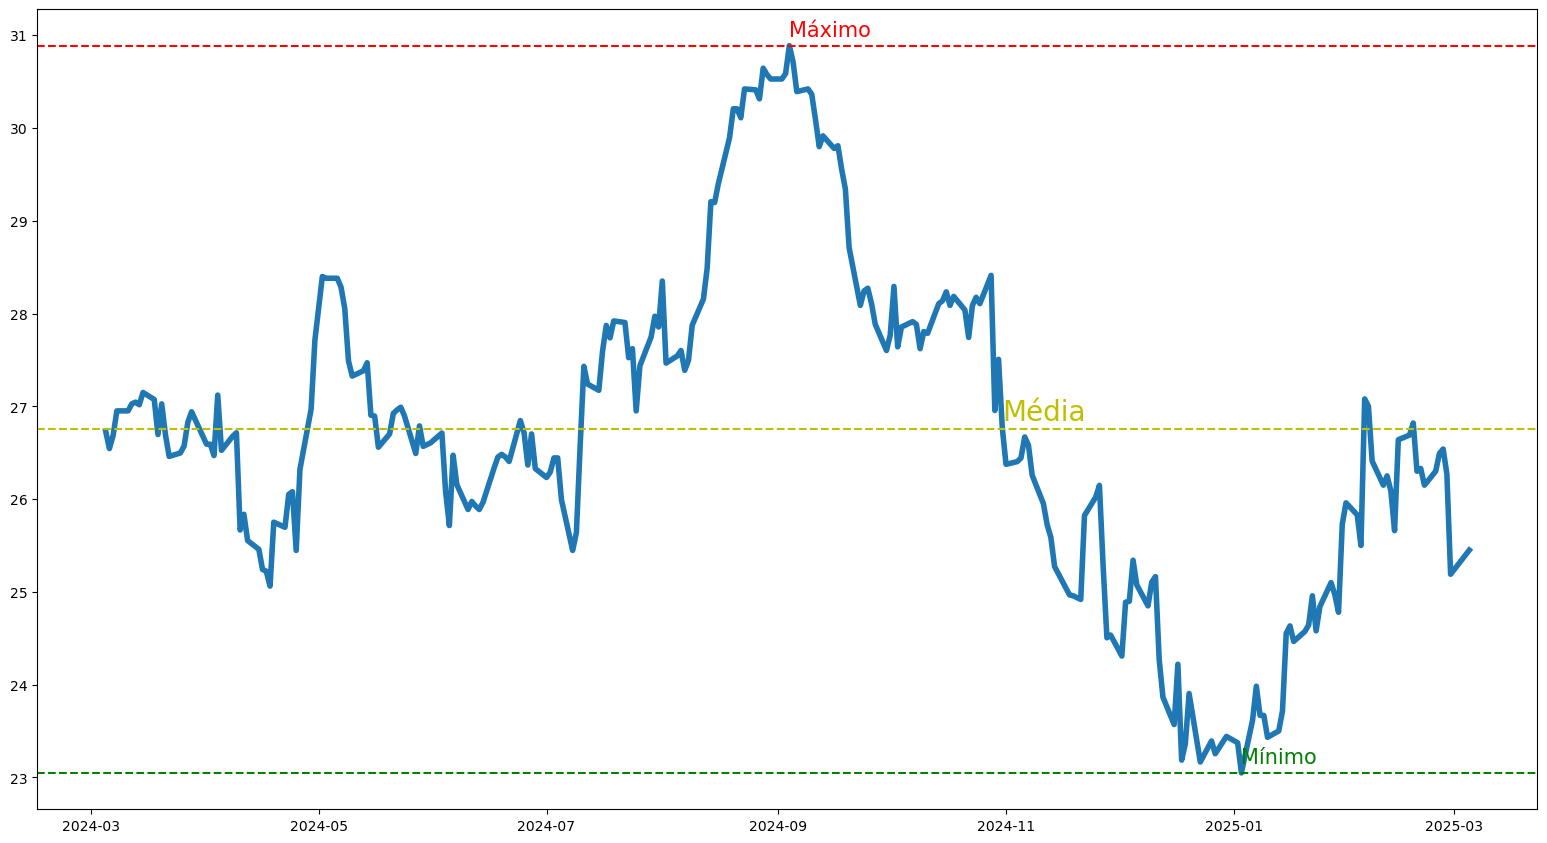

In [36]:
#Analisando apenas a variable "Close"

#Plotando um graáfico de linha
fig = plt.figure(figsize=(15,8))
ax = fig.add_axes([0, 0, 1, 1])
ax.plot(df_santander.index, df_santander['Close'], linewidth=4)

#Traçando uma linha rente ao valor maximo ja atingido lo papel
ax.axhline(df_santander['Close'].max(), c= 'r', ls = '--')
ax.annotate("Máximo", 
            (df_santander['Close'].idxmax(), df_santander['Close'].max() + 0.1),
            fontsize=15,
            c= 'r'
           )

#Traçando uma linha rente ao valor mínimo ja atingido lo papel
ax.axhline(df_santander['Close'].min(), c='g', ls = '--')
ax.annotate("Mínimo", 
            (df_santander['Close'].idxmin(), df_santander['Close'].min() + 0.1),
            fontsize=15,
            c='g'
           )

#Traçando uma linha rente a média ja atingido lo papel
ax.axhline(df_santander['Close'].mean(), c='y', ls = '--')
ax.annotate("Média", 
            ((df_santander['Close'] - df_santander['Close'].mean()).abs().idxmin(), df_santander['Close'].mean() + 0.1),
            fontsize=20,
            c='y'
           )


<Axes: xlabel='Close', ylabel='Count'>

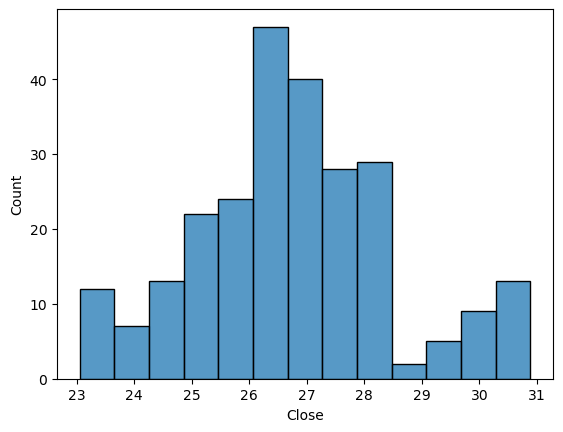

In [38]:
#Analisando a distribuição
sns.histplot(df_santander['Close'])

### Tratamento do dataframe santander

In [40]:
#adcionando um index
df_santander = df_santander.reset_index()
df_santander.head()


,Date,Open,High,Low,Close,Volume
0,2024-03-05 00:00:00-03:00,26.932,26.970,26.422,26.734,2230800
1,2024-03-06 00:00:00-03:00,26.904,27.121,26.545,26.545,1470600
2,2024-03-07 00:00:00-03:00,26.649,26.734,26.535,26.686,899200
3,2024-03-08 00:00:00-03:00,26.601,27.121,26.583,26.951,1146900
4,2024-03-11 00:00:00-03:00,26.951,27.055,26.847,26.951,951800


In [42]:
#Sem valores nulos, formatods corretos, porem o campo data esta vindo com horário, e sera necessário ser retirado
df_santander.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype                            
---  ------  --------------  -----                            
 0   Date    251 non-null    datetime64[ns, America/Sao_Paulo]
 1   Open    251 non-null    float64                          
 2   High    251 non-null    float64                          
 3   Low     251 non-null    float64                          
 4   Close   251 non-null    float64                          
 5   Volume  251 non-null    int64                            
dtypes: datetime64[ns, America/Sao_Paulo](1), float64(4), int64(1)
memory usage: 11.9 KB


In [44]:
#Removendo o timestamp da variavel date

df_santander['Date'] = df_santander['Date'].apply(
    lambda x: 
    x.date()
)

In [46]:
print(f'''Diferença entre o máximo e o mínimo
    {
    np.round(df_santander['Open'].max() - df_santander['Open'].min(), decimals=2)
    }'''
     )      

Diferença entre o máximo e o mínimo
    7.6


In [48]:
#Descobrindo a data do maximo e do minimo para open
df_santander.iloc[
[
    df_santander['Open'].idxmax(),df_santander['Open'].idxmin()
],
]




,Date,Open,High,Low,Close,Volume
129,2024-09-05,30.762,30.849,30.480,30.713,1952600
205,2024-12-26,23.166,23.560,23.157,23.393,1174100


In [50]:
#por se tratar de um ativo bem estavel, o valor de abertura e fechamento é bem próximo, portanto irei trabalhar apenas com a variavel 'Open'

df_open = df_santander.drop(
            columns=['High','Low','Close', 'Volume'],
)
df_open

,Date,Open
0,2024-03-05,26.932
1,2024-03-06,26.904
2,2024-03-07,26.649
3,2024-03-08,26.601
4,2024-03-11,26.951
...,...,...
246,2025-02-25,26.300
247,2025-02-26,26.700
248,2025-02-27,26.300
249,2025-02-28,26.080


In [52]:
#Verifiquei que o tipo da variavel date é 'Object' quando deveria ser datetime
df_open.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    251 non-null    object 
 1   Open    251 non-null    float64
dtypes: float64(1), object(1)
memory usage: 4.1+ KB


In [54]:
df_open['Date'] = pd.to_datetime(
                    df_open['Date']
                )
df_open.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    251 non-null    datetime64[ns]
 1   Open    251 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 4.1 KB


In [56]:
df_open.head()

,Date,Open
0,2024-03-05,26.932
1,2024-03-06,26.904
2,2024-03-07,26.649
3,2024-03-08,26.601
4,2024-03-11,26.951


In [58]:
#Agora criar uma variavel categorica, classificar bom base na media, se maior que media = sim a, se nao, nãp

valores = []

for valor in df_open['Open']:
    if valor > df_open['Open'].mean():
        valores.append('Sim')
    else:
        valores.append('Nao')

df_open['Acima_da_media?'] = valores
df_open.head(15)
        

,Date,Open,Acima_da_media?
0,2024-03-05,26.932,Sim
1,2024-03-06,26.904,Sim
2,2024-03-07,26.649,Nao
3,2024-03-08,26.601,Nao
4,2024-03-11,26.951,Sim
5,2024-03-12,27.027,Sim
6,2024-03-13,26.960,Sim
7,2024-03-14,27.008,Sim
8,2024-03-15,27.112,Sim
9,2024-03-18,27.112,Sim


In [60]:
#Porcentagem de observações acima e abaixo da media
df_open[['Acima_da_media?']].value_counts(normalize=True) * 100

Acima_da_media?
Nao               55.777
Sim               44.223
Name: proportion, dtype: float64

In [62]:
# Hoje é dia 23/11/2024, vou fazeruma comparação com o mesmo periodo do ano passado
#Para isso eu primeiramente teria que estrair da biblioteca yfinance um dataframe maior, de 2 anos, para que eu possa pegar todos os dias de novembro de 2023

df_santander_2y = cria_dataframe('SANB11.SA','2y')
df_santander_2y = df_santander_2y.reset_index()

df_santander_2y['Date'] = df_santander_2y['Date'].apply(
    lambda x: 
    x.date()
)

df_santander_2y['Date'] = pd.to_datetime(df_santander_2y['Date'])

df_santander_2y.drop(columns=['High','Low','Close','Volume','Dividends','Stock Splits'], inplace=True)
valores_2y = []

for valor in df_santander_2y['Open']:
    if valor > df_santander_2y['Open'].mean():
        valores_2y.append('Sim')
    else:
        valores_2y.append('Nao')

df_santander_2y['Acima_da_media?'] = valores_2y

df_open_novembro = df_santander_2y[df_santander_2y['Date'].dt.month == 11]

mes = []

for data in df_open_novembro['Date']:
    if data.year == 2022:
        mes.append('Novembro de 2022')
    elif data.year == 2023:
        mes.append('Novembro de 2023')
    else:
        mes.append('Novembro de 2024')

df_open_novembro['Mes'] = mes

#Agrupando por mes e verificando a media
pd.DataFrame(
    df_open_novembro.groupby('Mes')['Open'].mean()
).sort_values(by='Open', ascending=False)

#Logo temos que a maior media foi no mes de novemtro foi em 2023

C:\Users\FilipeQueirozdeAbreu\AppData\Local\Temp\ipykernel_22300\1157543481.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_open_novembro['Mes'] = mes


,Open
Mes,
Novembro de 2023,27.860
Novembro de 2024,25.875


In [64]:
#Agora verificando os valores maximos para o mes de novembro
pd.DataFrame(df_open_novembro.groupby('Mes')['Open'].max()).sort_values(by='Open', ascending=False)

,Open
Mes,
Novembro de 2023,29.686
Novembro de 2024,26.916


In [66]:
#Agora verificando os valores minimos para o mes de novembro
pd.DataFrame(df_open_novembro.groupby('Mes')['Open'].min()).sort_values(by='Open', ascending=False)

,Open
Mes,
Novembro de 2023,25.156
Novembro de 2024,24.652


# Machine Learning

In [80]:
#Testando adcionar uma coluna com o valor de close anterior + a media de Low high e Close_anterior do dia
#Tambem vou adcionar o uma coluna com o desvios em relação a media 

#df_santander = df_santander.drop(columns=['Date'])

medias = []

for item in range(0, len(df_santander)):
    medias.append(df_santander.iloc[item, 0:3].mean())

media_open = df_santander['Open'].mean()
media_high = df_santander['High'].mean()
media_low = df_santander['Low'].mean()

df_santander['Close_Anterior'] = df_santander['Close'].shift(1)
df_santander['Desvio_Open'] = (df_santander['Open'] - media_open).abs() #valores absolutos
df_santander['Desvio_High'] = (df_santander['High'] - media_high).abs()
df_santander['Desvio_Low'] = (df_santander['Low'] - media_low).abs()

df_santander['Medias'] = medias

X = df_santander.drop(columns=['Close'])
y = df_santander['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Raiz quadrada do MSE
r2 = r2_score(y_test, y_pred)

print("MEAN ABSOLUTE ERROR:", mae)
print("MEAN SQUARED ERROR:", mse)
print("ROOT MEAN SQUARED:", rmse)
print("R2:", r2)

MEAN ABSOLUTE ERROR: 0.17356896149484732
MEAN SQUARED ERROR: 0.05669078677492542
ROOT MEAN SQUARED: 0.2380982712556423
R2: 0.9826958265746696


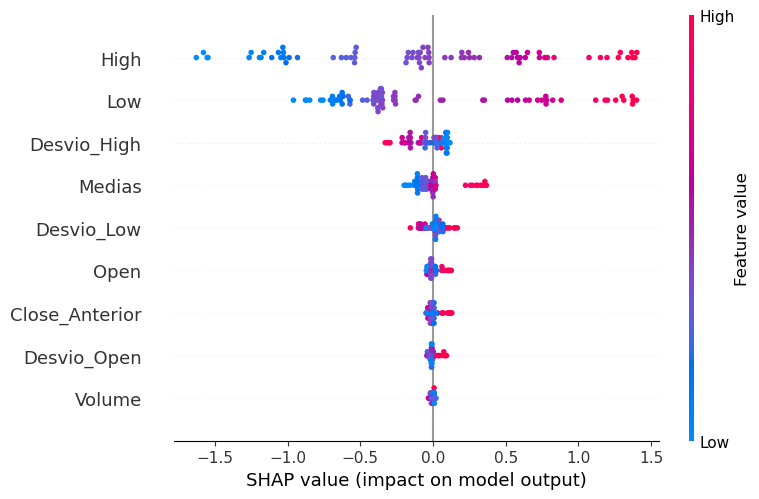

In [86]:
explainer = shap.TreeExplainer(model_rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

Percebe-se que das varias new features criadas, apenas Desvio_high e Medias tiveram alguma significancia
O modelo teve bons resultando utilizando random forest, sem sequer haver a necessidade de alterar os hiperparametros

Segundo o coeficiente de determinação R2, o modelo é capaz de explicar 98% da variacia

### Acrescentando media móvel

In [91]:
medias = []

for item in range(0, len(df_santander)):
    medias.append(df_santander.iloc[item, 0:3].mean())

media_open = df_santander['Open'].mean()
media_high = df_santander['High'].mean()
media_low = df_santander['Low'].mean()

df_santander['Close_Anterior'] = df_santander['Close'].shift(1)
df_santander['Desvio_Open'] = (df_santander['Open'] - media_open).abs() #valores absolutos
df_santander['Desvio_High'] = (df_santander['High'] - media_high).abs()
df_santander['Desvio_Low'] = (df_santander['Low'] - media_low).abs()

#Media movel de 5, 8 e 15 dias
df_santander['Media_Movel_5'] = df_santander['Close'].rolling(window=5).mean() 
df_santander['Media_Movel_8'] = df_santander['Close'].rolling(window=8).mean()
df_santander['Media_Movel_15'] = df_santander['Close'].rolling(window=15).mean()



df_santander['Medias'] = medias

X = df_santander.drop(columns=['Close'])
y = df_santander['Close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)  # Raiz quadrada do MSE
r2 = r2_score(y_test, y_pred)

print("MEAN ABSOLUTE ERROR:", mae)
print("MEAN SQUARED ERROR:", mse)
print("ROOT MEAN SQUARED:", rmse)
print("R2:", r2)

MEAN ABSOLUTE ERROR: 0.17919839507655078
MEAN SQUARED ERROR: 0.060587147098067964
ROOT MEAN SQUARED: 0.2461445654449189
R2: 0.9815065099573695


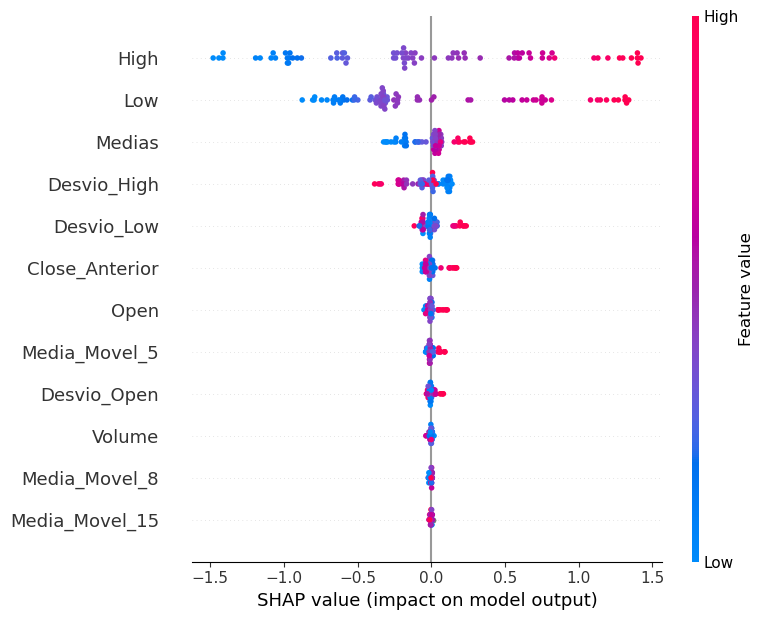

In [93]:
explainer = shap.TreeExplainer(model_rf)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)